In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('FirstGrowth_SecondWines.xlsx')
wine_name = xls.sheet_names
code_name = ['wine'+str(i) for i in range(11)]
for i,val in enumerate(wine_name):
    code_name[i] = pd.read_excel(xls,val )

In [3]:
def file_formatting(sheet):
    #deep copy
    wine = sheet.copy()
    vintage = wine.pop('Vintage')
    release_date =  wine.pop('Release Date')
    date = wine.columns
    wine = wine.T
    wine.columns = vintage
    wine.index = pd.to_datetime(wine.index)
    
    return vintage, release_date , wine

In [4]:
wine_list = []
vintage_list = []
for i in range(len(code_name)-1):
    vintage, release_date , wine = file_formatting(code_name[i])
    vintage_list.append(list(zip(vintage,release_date)))
    wine_list.append(wine)

In [27]:
my_model = Prophet(interval_width=0.95,weekly_seasonality=True,daily_seasonality=True) #设置置信空间为95%(如果不设置的话默认80%)
my_model.fit(wine)

In [31]:

future = my_model.make_future_dataframe(periods=365)
print(future.head())

          ds
0 2008-06-30
1 2008-07-31
2 2008-08-31
3 2008-09-30
4 2008-10-31


In [65]:
wine = wine_list[3][2007]
wine = wine.reset_index()

In [66]:
wine = wine.rename(columns={'index':'ds',2007:'y'})

In [97]:
def train_test_split(data):
    train = data[:122]
    test = data[122:]
    return train, test
train, test = train_test_split(wine)

In [98]:
m = Prophet(changepoint_prior_scale=0.1,daily_seasonality=True,weekly_seasonality=True)
m.fit(train)

In [108]:
future = m.make_future_dataframe(periods=12,freq='MS')
future.tail()

,ds
129,2019-03-01
130,2019-04-01
131,2019-05-01
132,2019-06-01
133,2019-07-01


In [109]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
129,2019-03-01,2859.273430,2681.478182,3032.707630
130,2019-04-01,2881.207680,2707.270889,3060.957199
131,2019-05-01,2823.625153,2645.937856,2992.207588
132,2019-06-01,2775.146458,2613.031381,2960.192751
133,2019-07-01,2985.351167,2802.719354,3160.272001


In [85]:
import numpy as np

In [110]:
temp = np.asarray(forecast[[ 'yhat']]).flatten()

In [120]:
ans = []
for i in np.asarray(test):
    ans.append(i[1])

In [121]:
ans

[2714.0,
 2690.0,
 2690.0,
 2286.0,
 2300.0,
 2662.0,
 2700.0,
 2700.0,
 2700.0,
 2540.0,
 2400.0,
 2400.0]

In [122]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ans,temp[122:] ))
print(rms)

264.7351142509767


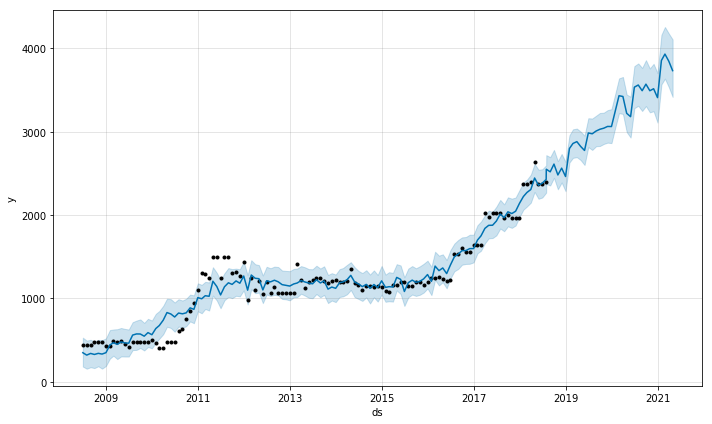

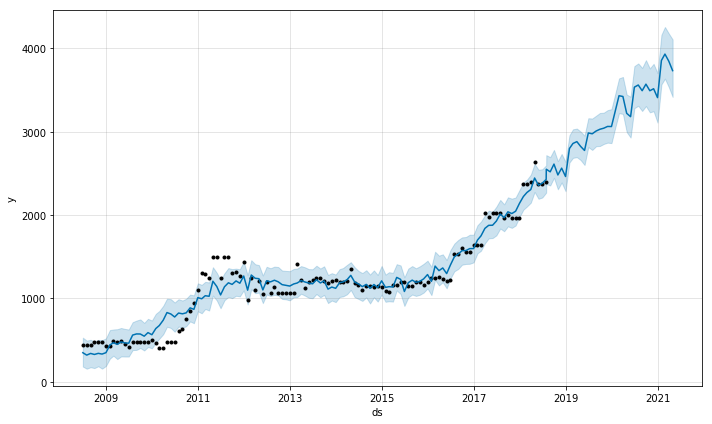

In [104]:
m.plot(forecast)

In [94]:
df.set_index(wine_list[3][2007].index)

,yhat
0,285.498799
1,333.047527
2,361.923142
3,374.918263
4,335.387516
5,358.126777
6,375.512868
7,395.487419
8,493.376861
9,446.707380


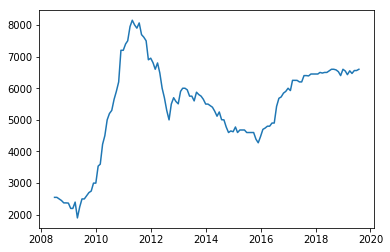

In [40]:
plt.plot(wine_list[0][2007])

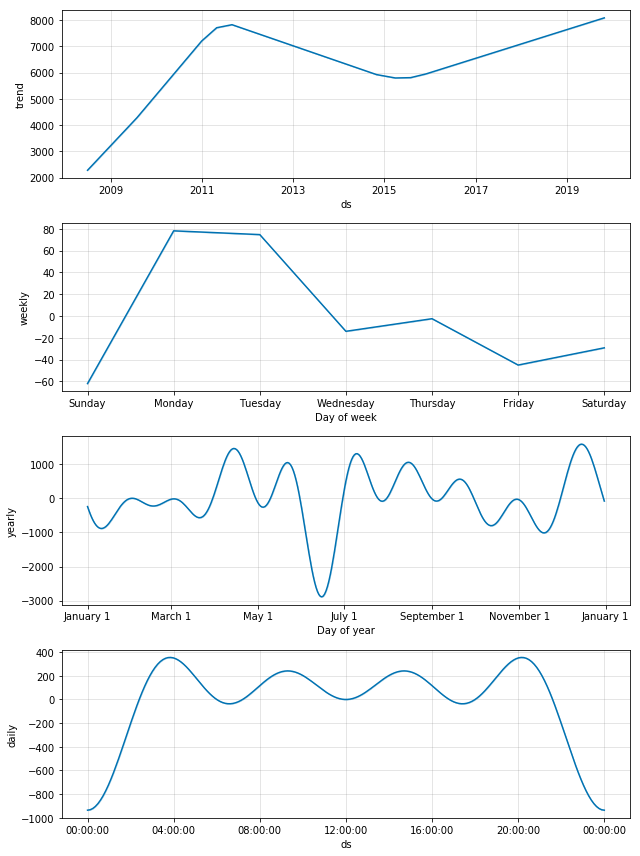

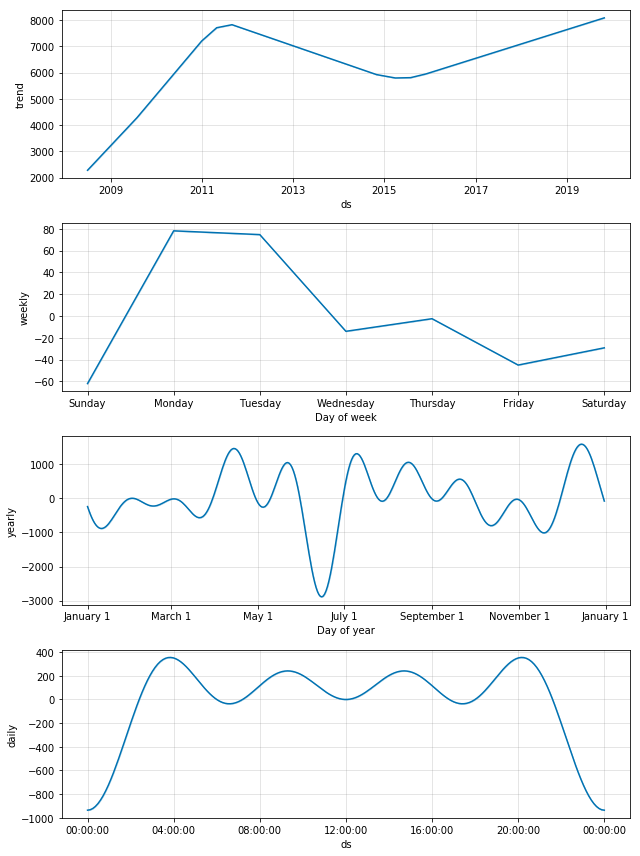

In [57]:
m.plot_components(forecast)

In [78]:
pd.plotting.register_matplotlib_converters()